# Exploratory Data Analysis - EDA

- EDA is applied to investigate the data and summarize the key insights.
- It will give you the basic understanding of your data, it’s distribution, null values and much more.
- You can either explore data using graphs or through some python functions.
- There will be two type of analysis. Univariate and Bivariate. In the univariate, you will be analyzing a single attribute. But in the bivariate, you will be analyzing an attribute with the target attribute.
- In the non-graphical approach, you will be using functions such as shape, summary, describe, isnull, info, datatypes and more.
- In the graphical approach, you will be using plots such as scatter, box, bar, density and correlation plots.

## Import the Data
Well, first things first. We will load the titanic dataset into python to perform EDA.

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col = 0)

# View the data
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploritory Data Analysis
The `df.info()` function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data. Use `describe()` to get a summary statistics of the data.

In [2]:
#Basic information
df.info()

#Describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using this function, you can see the number of null values, datatypes, and memory usage as shown in the above outputs along with descriptive statistics.

### Duplicate values

You can use the `df.duplicate.sum()` function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [7]:
# Find the duplicate rows
df.duplicated().sum()

0

In [8]:
# Find the duplicate names
df.duplicated(subset = ["Name"]).sum()

0

In [9]:
# Find the duplicate tickets
df.duplicated(subset = ["Ticket"]).sum()

210

Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know. However some persons have the same ticket! This is something to investigate

### Unique values in the data

You can find the number of `unique()` values in the particular column using unique() function in python.

In [10]:
# unique values for Pclass
df['Pclass'].unique()

array([3, 1, 2])

In [11]:
# unique values for Survived
df['Survived'].unique()

array([0, 1])

In [12]:
# unique values for Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
# unique values for Age
df['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [14]:
# unique values for SibSp
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [15]:
# unique values for Parch
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [16]:
# unique values for Ticket
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [17]:
# unique values for Ticket
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

The `unique()` function has returned the unique values which are present in the data and it is pretty much cool!

### Visualize the Unique counts

Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the `sns.countlot()` function and specify the variable to plot the count plot.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

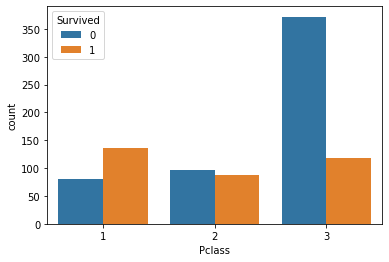

In [39]:
# Plot the unique values
sns.countplot(data = df, x = 'Pclass', hue = "Survived")

That’s great! You are doing good. It is as simple as that. Though EDA has two approaches, a blend of graphical and non-graphical will give you the bigger picture altogether.

### Find the Null values
Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [6]:
#Find null values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Oh no, we have some null values in the **Age** and **Cabin** variables. But, don’t worry. We will find a way to deal with them soon.

## Replace the Null values
Hey, we got a `replace()` function to replace all the null values with a specific data. It is too good!

In [7]:
#Replace null values
df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Whoo! That’s awesome. It is very easy to find and replace the null values in the data as shown. I have used 0 to replace null values. You can even opt for more meaningful methods such as mean or median.

In [33]:
df[""]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [35]:
my_string="hello python world , i'm a beginner"
print(my_string.split(",",1)[1])

 i'm a beginner


## Know the datatypes
Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [8]:
# Datatypes
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age          object
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

That’s it. You have to use the dtypes function for this a shown and you will get the datatypes of each attribute.

## Filter the Data
Yes, you can filter the data based on some logic.

In [9]:
# Filter data
df[df['Pclass'] == 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


You can see that the above code has returned only data values that belong to class 1.

## A quick box plot
You can create a box plot for any numerical column using a single line of code.

<AxesSubplot:>

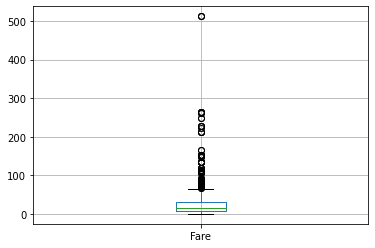

In [46]:
# Boxplot
df[['Fare']].boxplot()

<AxesSubplot:>

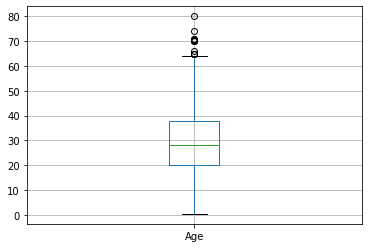

In [45]:
df[['Age']].boxplot()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

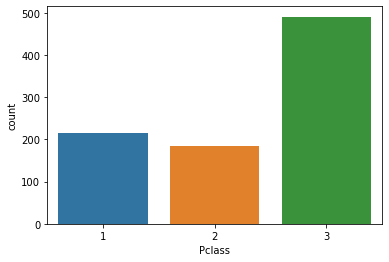

In [34]:
sns.countplot(data = df, x = "Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

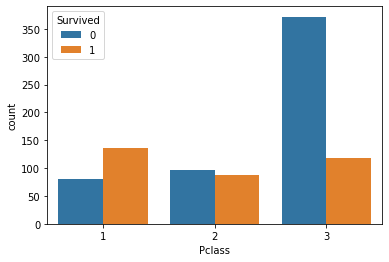

In [35]:
sns.countplot(data = df, x = "Pclass", hue = "Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

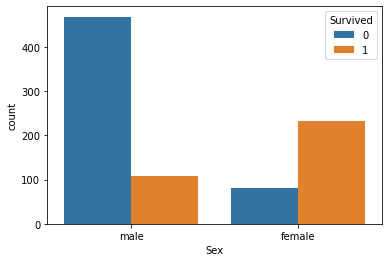

In [32]:
sns.countplot(data = df, x = "Sex", hue = "Survived")

<AxesSubplot:xlabel='count', ylabel='Parch'>

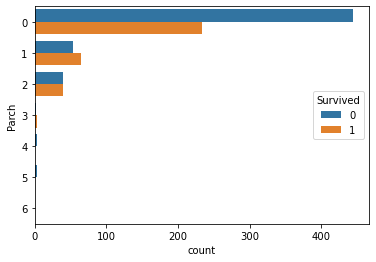

In [36]:
sns.countplot(data = df, y = "Parch", hue = "Survived")

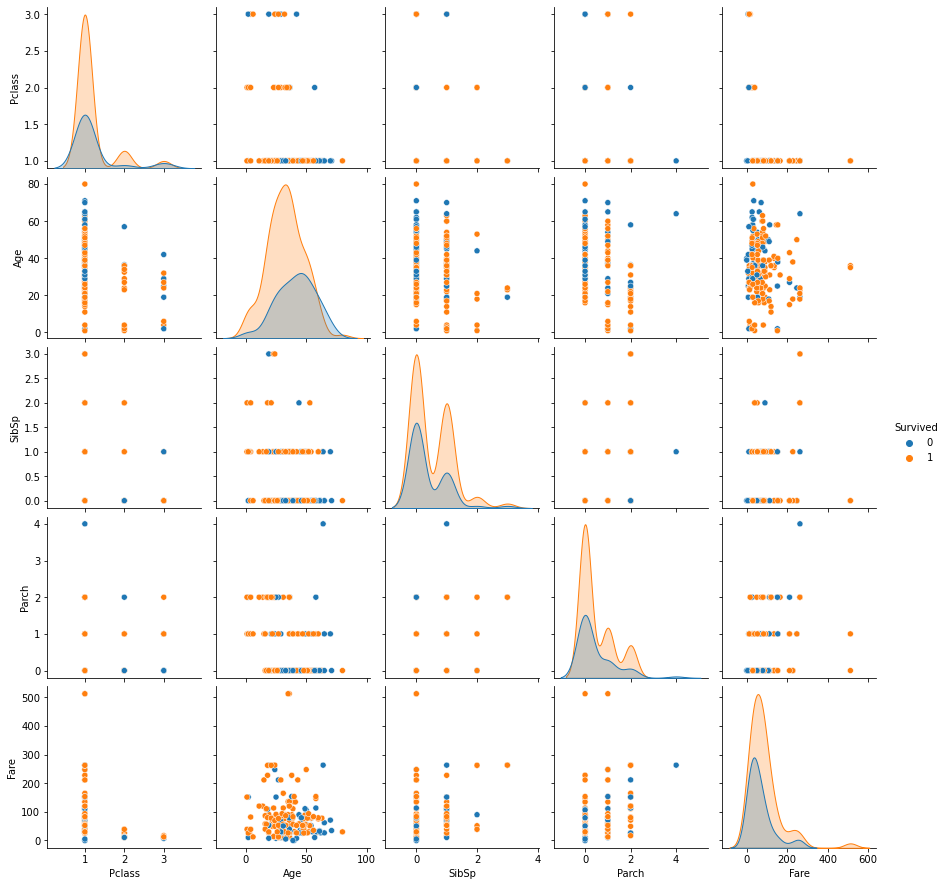

In [17]:
sns.pairplot(df.dropna(), hue = 'Survived')

## Correlation Plot - EDA
Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [25]:
# Correlation 
df.corr()

,Survived,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000


This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated. You can even visualize the correlation matrix using seaborn library as shown below.

<AxesSubplot:>

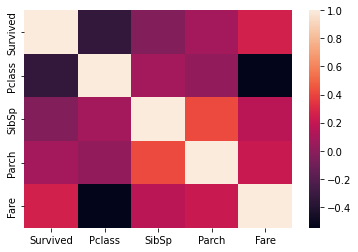

In [26]:
# Correlation plot
sns.heatmap(df.corr())

EDA is the most important part of any analysis. You will get to know many things about your data. You will find answers to your most of the questions with EDA. I have tried to show most of the python functions used for exploring the data with visualizations. I hope you got something from this article.

In [35]:
import re

In [37]:
text = "dsdfsd, mr."


re.sub(r"\\., | .\\.", "", text)

'dsdfsd, mr.'

It is a good idea to

In [24]:
# Create group names
group_names = ["young", "teen", "adult"]

# Create ranges
ranges = [0, 13, 18, np.inf]

# Calculate the names bases on the ranges
age_category = pd.cut(df["Age"], labels = group_names, bins = ranges)

df['Age_Category'] = age_category

<AxesSubplot:xlabel='Age_Category', ylabel='count'>

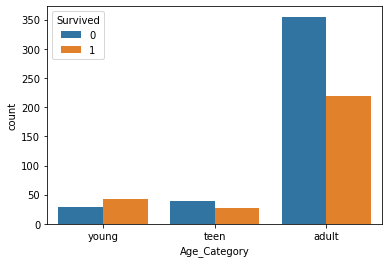

In [28]:
sns.countplot(x = "Age_Category", hue ="Survived", data = df)